# Project - Modeling Complex Genomic Associations


### Import Necessary Python Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score

### Load 'data.csv' (the 'X' part of the dataset)

In [ ]:
# Load tab-delimited text file into a DataFrame
df_x = pd.read_csv('Data/cancer_subtype_data.csv')

# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
df_x.head()

### Load 'labels.csv' (the 'y' part of the dataset)

In [ ]:
# Load tab-delimited text file into a DataFrame
df_y = pd.read_csv('Data/cancer_subtype_labels.csv')

# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
df_y.head()

In [ ]:
df = pd.merge(df_x, df_y)
df.head()

In [ ]:
df.shape

#### Drop the instance label column

In [ ]:
df = df.drop(df.columns[0], axis=1)
df.head()

In [ ]:
df.isna().sum().sum()

gene_0        0
gene_1        0
gene_2        0
gene_3        0
gene_4        0
             ..
gene_20527    0
gene_20528    0
gene_20529    0
gene_20530    0
Class         0
Length: 20532, dtype: int64

## Basic Exploratory Analysis

Class
BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: count, dtype: int64


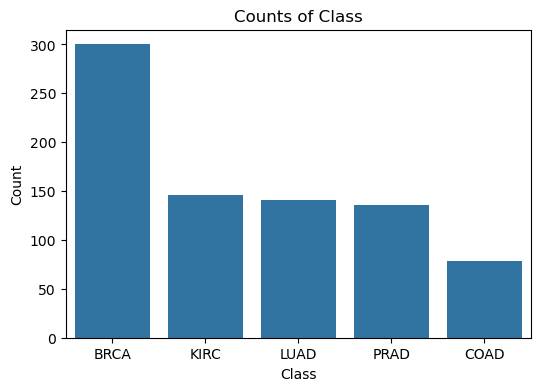

In [17]:
# Choose the column for which you want to plot the counts
column_name = 'Class'

# Get the value counts for the specified column
value_counts = df[column_name].value_counts()
print(value_counts)

# Plot the value counts using seaborn
plt.figure(figsize=(6, 4))
sns.barplot(x=value_counts.index, y=value_counts.values)
plt.title(f'Counts of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Missing Value Assessment

# Group the DataFrame by the "class" column
grouped_df = df.groupby('Class')

# Calculate the sum of missing values in rows within each group
missing_values_per_class = grouped_df.apply(lambda x: x.isnull().sum().sum())

# Now 'missing_values_per_class' contains the sum of missing values for each class
print("Sum of missing values for each class:")
print(missing_values_per_class)

# Count missing values in dataset
total_missing_values = df.isna().sum().sum()

# Now 'total_missing_values' contains the total number of missing values in the DataFrame
print("Total number of missing values:", total_missing_values)

### Cluster Analysis

In [ ]:
# Drop the class column for clustering
df_x = df.drop(columns=['Class'])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_x)

# Apply PCA for dimensionality reduction (optional)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', marker='o', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering')
plt.colorbar(label='Cluster')
plt.show()

### Train and Evaluate Decision Tree Models (with 3-fold CV)

In [ ]:
def train_model(model):
    # Split data into features and target
    X = df.drop(columns=['Class'])
    y = df['Class']

    # Initialize evaluation metrics lists
    accuracies = []
    balanced_accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

    # Initialize KFold cross-validation
    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    
    # Iterate over each fold of cross-validation
    for train_index, test_index in kf.split(X):
        # Split data into train and test sets for this fold
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)

        # Predict on the testing data
        y_pred = model.predict(X_test)

        # Calculate evaluation metrics
        accuracies.append(accuracy_score(y_test, y_pred))
        balanced_accuracies.append(balanced_accuracy_score(y_test, y_pred))
        precisions.append(precision_score(y_test, y_pred, average='weighted'))
        recalls.append(recall_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
        

    # Calculate average evaluation metrics
    avg_accuracy = sum(accuracies) / len(accuracies)
    avg_balanced_accuracy = sum(balanced_accuracies) / len(balanced_accuracies)
    avg_precision = sum(precisions) / len(precisions)
    avg_recall = sum(recalls) / len(recalls)
    avg_f1 = sum(f1_scores) / len(f1_scores)

    # Print summary of model performance
    print("Average Accuracy:", avg_accuracy)
    print("Average Balanced Accuracy:", avg_balanced_accuracy)
    print("Average Precision:", avg_precision)
    print("Average Recall:", avg_recall)
    print("Average F1 Score:", avg_f1)


In [ ]:
# Train a decision tree model
model = DecisionTreeClassifier()
train_model(model)

In [ ]:
# Train a random forest model
model = RandomForestClassifier()
train_model(model)